In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Function to clean NaN and infinite values
def clean_data(X_train, X_valid, X_test):
    X_train.fillna(X_train.mean(), inplace=True)
    X_valid.fillna(X_valid.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)
    return X_train, X_valid, X_test

In [5]:
# Load data
data_train = pd.read_pickle("clean_data/train/all_data_train.pkl")
data_valid = pd.read_pickle("clean_data/valid/all_data_valid.pkl")
data_test = pd.read_pickle("clean_data/test/all_data_test.pkl")

In [6]:
# Split the data into features (X) and target (y)
X_train = data_train.drop("class", axis=1)
X_valid = data_valid.drop("class", axis=1)
X_test = data_test.drop("class", axis=1)

y_train = data_train["class"]
y_valid = data_valid["class"]
y_test = data_test["class"]

In [7]:
# Encode the target variable
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_valid = encoder.transform(y_valid)
encoded_y_test = encoder.transform(y_test)

In [8]:
# Clean the data (replace NaNs and infinities)
X_train, X_valid, X_test = clean_data(X_train, X_valid, X_test)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

2024-10-08 11:52:47.377217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1198/1198 [==============================] - 4s 3ms/step - loss: -5756.4282 - accuracy: 0.2495
Epoch 2/10
1198/1198 [==============================] - 3s 2ms/step - loss: -83421.2031 - accuracy: 0.2466
Epoch 3/10
1198/1198 [==============================] - 3s 3ms/step - loss: -313957.5625 - accuracy: 0.2428
Epoch 4/10
1198/1198 [==============================] - 3s 3ms/step - loss: -732063.0000 - accuracy: 0.2409
Epoch 5/10
1198/1198 [==============================] - 3s 2ms/step - loss: -1362254.6250 - accuracy: 0.2400
Epoch 6/10
1198/1198 [==============================] - 4s 3ms/step - loss: -2230400.0000 - accuracy: 0.2382
Epoch 7/10
1198/1198 [==============================] - 3s 2ms/step - loss: -3351891.0000 - accuracy: 0.2368
Epoch 8/10
1198/1198 [==============================] - 4s 3ms/step - loss: -4759916.5000 - accuracy: 0.2349
Epoch 9/10
1198/1198 [==============================] - 5s 4ms/step - loss: -6485237.5000 - accuracy: 0.2334
Epoch 10/10
125/125 [=====

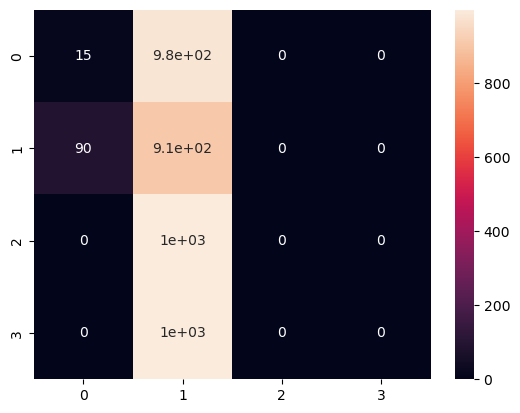

Model saved to disk


In [10]:
# cretae the model with RNN
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
model.fit(X_train, encoded_y_train, epochs=10, batch_size=10)

# Evaluate the model
_, accuracy = model.evaluate(X_valid, encoded_y_valid)
print("Accuracy: %.2f" % (accuracy * 100))

# Predict the test data
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

# Create confusion matrix
cm = confusion_matrix(encoded_y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Save the model
model.save("model.h5")
print("Model saved to disk")

Epoch 1/10
1198/1198 [==============================] - 27s 15ms/step - loss: 0.5511 - accuracy: 0.7708 - val_loss: 0.3506 - val_accuracy: 0.8615
Epoch 2/10
1198/1198 [==============================] - 14s 12ms/step - loss: 0.3201 - accuracy: 0.8778 - val_loss: 0.2777 - val_accuracy: 0.9064
Epoch 3/10
1198/1198 [==============================] - 15s 12ms/step - loss: 0.2589 - accuracy: 0.9014 - val_loss: 0.2399 - val_accuracy: 0.9194
Epoch 4/10
1198/1198 [==============================] - 12s 10ms/step - loss: 0.2221 - accuracy: 0.9187 - val_loss: 0.2207 - val_accuracy: 0.9221
Epoch 5/10
1198/1198 [==============================] - 11s 9ms/step - loss: 0.1972 - accuracy: 0.9252 - val_loss: 0.2118 - val_accuracy: 0.9284
Epoch 6/10
1198/1198 [==============================] - 11s 9ms/step - loss: 0.1784 - accuracy: 0.9338 - val_loss: 0.2236 - val_accuracy: 0.9209
Epoch 7/10
1198/1198 [==============================] - 14s 11ms/step - loss: 0.1632 - accuracy: 0.9388 - val_loss: 0.2056 - v

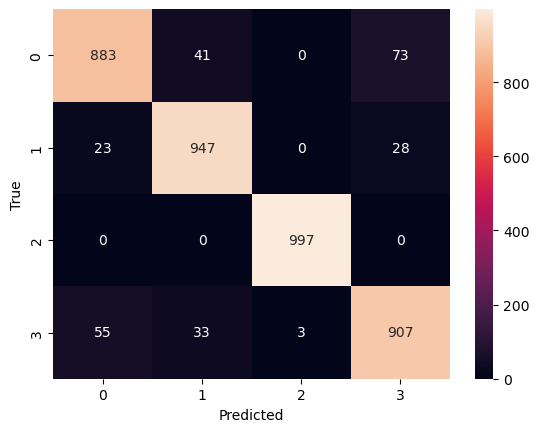

Model saved to disk


In [14]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Function to clean NaN and infinite values
def clean_data(X_train, X_valid, X_test):
    X_train.fillna(X_train.mean(), inplace=True)
    X_valid.fillna(X_valid.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)
    return X_train, X_valid, X_test


# Load data
data_train = pd.read_pickle("clean_data/train/all_data_train.pkl")
data_valid = pd.read_pickle("clean_data/valid/all_data_valid.pkl")
data_test = pd.read_pickle("clean_data/test/all_data_test.pkl")

# Split the data into features (X) and target (y)
X_train = data_train.drop("class", axis=1)
X_valid = data_valid.drop("class", axis=1)
X_test = data_test.drop("class", axis=1)

y_train = data_train["class"]
y_valid = data_valid["class"]
y_test = data_test["class"]

# Encode the target variable (multi-class encoding)
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_valid = encoder.transform(y_valid)
encoded_y_test = encoder.transform(y_test)

# Clean the data (replace NaNs and infinities)
X_train, X_valid, X_test = clean_data(X_train, X_valid, X_test)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Build the model (RNN with GRU)
model = Sequential()
model.add(GRU(64, return_sequences=True))
model.add(GRU(64))
model.add(Dense(4, activation="softmax"))  # 4 classes for multi-class classification

# Compile the model for multi-class classification
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Reshape data for RNN (time step dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Fit the model
model.fit(
    X_train,
    encoded_y_train,
    epochs=10,
    batch_size=10,
    validation_data=(X_valid, encoded_y_valid),
)

# Evaluate the model
_, accuracy = model.evaluate(X_valid, encoded_y_valid)
print("Validation Accuracy: %.2f" % (accuracy * 100))

# Predict the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Create confusion matrix
cm = confusion_matrix(encoded_y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save the model
model.save("model.h5")
print("Model saved to disk")

Window length 50 is too large for 6 features. Adjusting window length.
Epoch 1/10
1198/1198 [==============================] - 28s 17ms/step - loss: 0.6350 - accuracy: 0.7307 - val_loss: 0.4049 - val_accuracy: 0.8330
Epoch 2/10
1198/1198 [==============================] - 22s 19ms/step - loss: 0.4136 - accuracy: 0.8375 - val_loss: 0.3234 - val_accuracy: 0.8841
Epoch 3/10
1198/1198 [==============================] - 21s 17ms/step - loss: 0.3443 - accuracy: 0.8617 - val_loss: 0.2895 - val_accuracy: 0.8893
Epoch 4/10
1198/1198 [==============================] - 20s 17ms/step - loss: 0.3089 - accuracy: 0.8795 - val_loss: 0.2819 - val_accuracy: 0.8936
Epoch 5/10
1198/1198 [==============================] - 19s 15ms/step - loss: 0.2775 - accuracy: 0.8936 - val_loss: 0.2769 - val_accuracy: 0.8906
Epoch 6/10
1198/1198 [==============================] - 21s 17ms/step - loss: 0.2643 - accuracy: 0.8996 - val_loss: 0.2463 - val_accuracy: 0.9109
Epoch 7/10
1198/1198 [==============================]

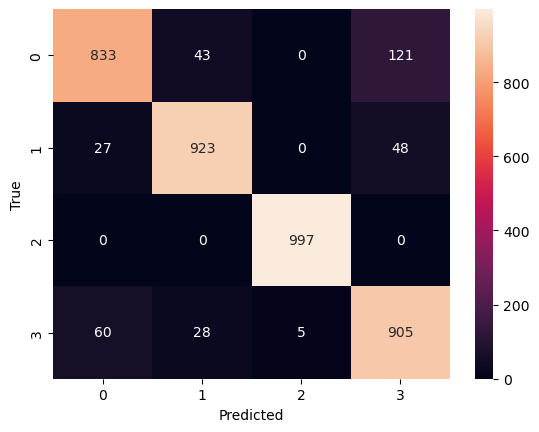

Epoch 1/10
1198/1198 [==============================] - 30s 19ms/step - loss: 0.5619 - accuracy: 0.7617 - val_loss: 0.3359 - val_accuracy: 0.8736
Epoch 2/10
1198/1198 [==============================] - 20s 17ms/step - loss: 0.3350 - accuracy: 0.8703 - val_loss: 0.2897 - val_accuracy: 0.8931
Epoch 3/10
1198/1198 [==============================] - 23s 19ms/step - loss: 0.2740 - accuracy: 0.8968 - val_loss: 0.2286 - val_accuracy: 0.9211
Epoch 4/10
1198/1198 [==============================] - 21s 18ms/step - loss: 0.2400 - accuracy: 0.9088 - val_loss: 0.2158 - val_accuracy: 0.9256
Epoch 5/10
1198/1198 [==============================] - 23s 19ms/step - loss: 0.2149 - accuracy: 0.9168 - val_loss: 0.2094 - val_accuracy: 0.9286
Epoch 6/10
1198/1198 [==============================] - 22s 19ms/step - loss: 0.1934 - accuracy: 0.9285 - val_loss: 0.1977 - val_accuracy: 0.9337
Epoch 7/10
1198/1198 [==============================] - 22s 19ms/step - loss: 0.1834 - accuracy: 0.9328 - val_loss: 0.2156 -

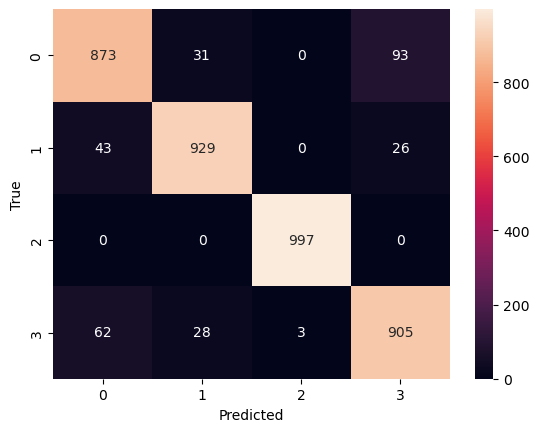

Epoch 1/10
1198/1198 [==============================] - 39s 22ms/step - loss: 0.5174 - accuracy: 0.7837 - val_loss: 0.3400 - val_accuracy: 0.8643
Epoch 2/10
1198/1198 [==============================] - 26s 22ms/step - loss: 0.3012 - accuracy: 0.8837 - val_loss: 0.2322 - val_accuracy: 0.9191
Epoch 3/10
1198/1198 [==============================] - 26s 22ms/step - loss: 0.2520 - accuracy: 0.9066 - val_loss: 0.2264 - val_accuracy: 0.9149
Epoch 4/10
1198/1198 [==============================] - 26s 22ms/step - loss: 0.2143 - accuracy: 0.9191 - val_loss: 0.2405 - val_accuracy: 0.9211
Epoch 5/10
1198/1198 [==============================] - 26s 22ms/step - loss: 0.1901 - accuracy: 0.9272 - val_loss: 0.2278 - val_accuracy: 0.9211
Epoch 6/10
1198/1198 [==============================] - 27s 22ms/step - loss: 0.1773 - accuracy: 0.9320 - val_loss: 0.2296 - val_accuracy: 0.9239
Epoch 7/10
1198/1198 [==============================] - 27s 22ms/step - loss: 0.1609 - accuracy: 0.9401 - val_loss: 0.2161 -

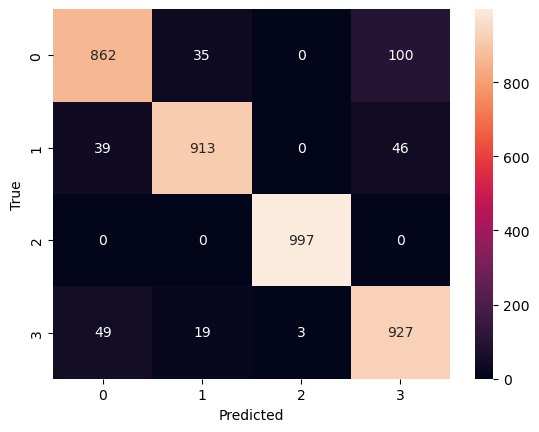

FileNotFoundError: [Errno 2] No such file or directory: 'new_data.pkl'

In [19]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Function to clean NaN and infinite values
def clean_data(X_train, X_valid, X_test):
    X_train.fillna(X_train.mean(), inplace=True)
    X_valid.fillna(X_valid.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)
    return X_train, X_valid, X_test

In [ ]:
# Load data
data_train = pd.read_pickle("clean_data/train/all_data_train.pkl")
data_valid = pd.read_pickle("clean_data/valid/all_data_valid.pkl")
data_test = pd.read_pickle("clean_data/test/all_data_test.pkl")

In [ ]:
# Split the data into features (X) and target (y)
X_train = data_train.drop("class", axis=1)
X_valid = data_valid.drop("class", axis=1)
X_test = data_test.drop("class", axis=1)

y_train = data_train["class"]
y_valid = data_valid["class"]
y_test = data_test["class"]

In [ ]:
# Encode the target variable (multi-class encoding)
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_valid = encoder.transform(y_valid)
encoded_y_test = encoder.transform(y_test)

# Clean the data (replace NaNs and infinities)
X_train, X_valid, X_test = clean_data(X_train, X_valid, X_test)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# Function to build a model with variable layers and neurons
def build_gru_model(num_neurons, num_layers, input_shape):
    model = Sequential()
    for _ in range(num_layers):
        model.add(GRU(num_neurons, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(0.2))  # Add dropout for regularization
    model.add(GRU(num_neurons))  # Last layer without return_sequences
    model.add(
        Dense(4, activation="softmax")
    )  # 4 classes for multi-class classification
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

In [ ]:
# Check and adjust the window length based on the number of features
def adjust_window_length(X, window_length):
    num_features = X.shape[1]

    # Ensure the window length does not exceed the number of features
    if window_length > num_features:
        print(
            f"Window length {window_length} is too large for {num_features} features. Adjusting window length."
        )
        window_length = num_features

    if num_features % window_length != 0:
        # Adjust window length to fit the number of features
        new_window_length = num_features // (num_features // window_length)
        print(f"Adjusted window length from {window_length} to {new_window_length}")
        return new_window_length

    return window_length

In [ ]:
# Experiment with different window lengths and number of neurons/layers
window_lengths = [50]  # Example window sizes
num_neurons_list = [32, 64, 128]  # Different neuron sizes
num_layers_list = [2]  # Different number of layers

for window_length in window_lengths:
    # Adjust window length based on the feature size
    window_length = adjust_window_length(X_train, window_length)

    # Ensure the reshaping can happen correctly
    X_train_reshaped = X_train.reshape(
        X_train.shape[0], window_length, X_train.shape[1] // window_length
    )
    X_valid_reshaped = X_valid.reshape(
        X_valid.shape[0], window_length, X_valid.shape[1] // window_length
    )
    X_test_reshaped = X_test.reshape(
        X_test.shape[0], window_length, X_test.shape[1] // window_length
    )

    for num_neurons in num_neurons_list:
        for num_layers in num_layers_list:
            model = build_gru_model(
                num_neurons, num_layers, (window_length, X_train_reshaped.shape[2])
            )

            # Fit the model
            model.fit(
                X_train_reshaped,
                encoded_y_train,
                epochs=10,
                batch_size=10,
                validation_data=(X_valid_reshaped, encoded_y_valid),
            )

            # Evaluate the model
            _, accuracy = model.evaluate(X_valid_reshaped, encoded_y_valid)
            print(
                f"Window: {window_length}, Neurons: {num_neurons}, Layers: {num_layers}, Validation Accuracy: {accuracy:.2f}"
            )

            # Predict the test data
            y_pred = model.predict(X_test_reshaped)
            y_pred = np.argmax(y_pred, axis=1)

            # Create confusion matrix
            cm = confusion_matrix(encoded_y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt="g")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.show()

In [20]:
# Load new 1-minute data for prediction


def combine_pickles_with_class(path, class_name):
    # Initialize lists to hold acc and gyro files
    acc_files = []
    gyro_files = []

    # List all files in the directory
    for file in os.listdir(path):
        if file.startswith(class_name) and file.endswith("_acc.pkl"):
            acc_files.append(file)
        elif file.startswith(class_name) and file.endswith("_gyro.pkl"):
            gyro_files.append(file)

    # Create a list to hold the combined data for all the files
    combined_data_list = []

    # Rename columns appropriately for acc and gyro DataFrames
    for i in range(len(acc_files)):
        acc_df = pd.read_pickle(path + acc_files[i])
        gyro_df = pd.read_pickle(path + gyro_files[i])

        # Drop the first column (assumed to be an index or unneeded)

        # if num of columns is 4, then drop the first column
        if len(acc_df.columns) == 4:
            acc_df.drop(acc_df.columns[0], axis=1, inplace=True)
            gyro_df.drop(gyro_df.columns[0], axis=1, inplace=True)

        # Rename columns
        acc_df.columns = ["ax", "ay", "az"]
        gyro_df.columns = ["gx", "gy", "gz"]

        # Combine acc and gyro DataFrames horizontally
        combined_df = pd.concat([acc_df, gyro_df], axis=1)

        # # Add class column
        # combined_df["class"] = class_name

        # # Append the combined DataFrame to the list
        combined_data_list.append(combined_df)

    # Concatenate all DataFrames vertically to get the final combined DataFrame
    final_df = pd.concat(combined_data_list, ignore_index=True)

    return final_df


# test the function
new_data = combine_pickles_with_class("newdata/", "data")

In [23]:
new_data_scaled = scaler.transform(new_data)  # Apply same scaling
new_data_reshaped = new_data_scaled.reshape(
    new_data_scaled.shape[0], window_length, new_data_scaled.shape[1] // window_length
)

In [24]:
new_data.head()

,ax,ay,az,gx,gy,gz
0,3.950734,9.491013,0.552351,-0.425043,0.388124,0.519434
1,3.212619,9.993668,0.108075,-0.357386,0.326105,0.766726
2,2.621648,10.544523,0.529000,-0.235880,0.480572,1.073316
3,2.145039,11.045531,1.254990,-0.128082,0.858053,1.413990
4,1.873654,11.362272,1.586401,-0.078937,1.375765,1.791496


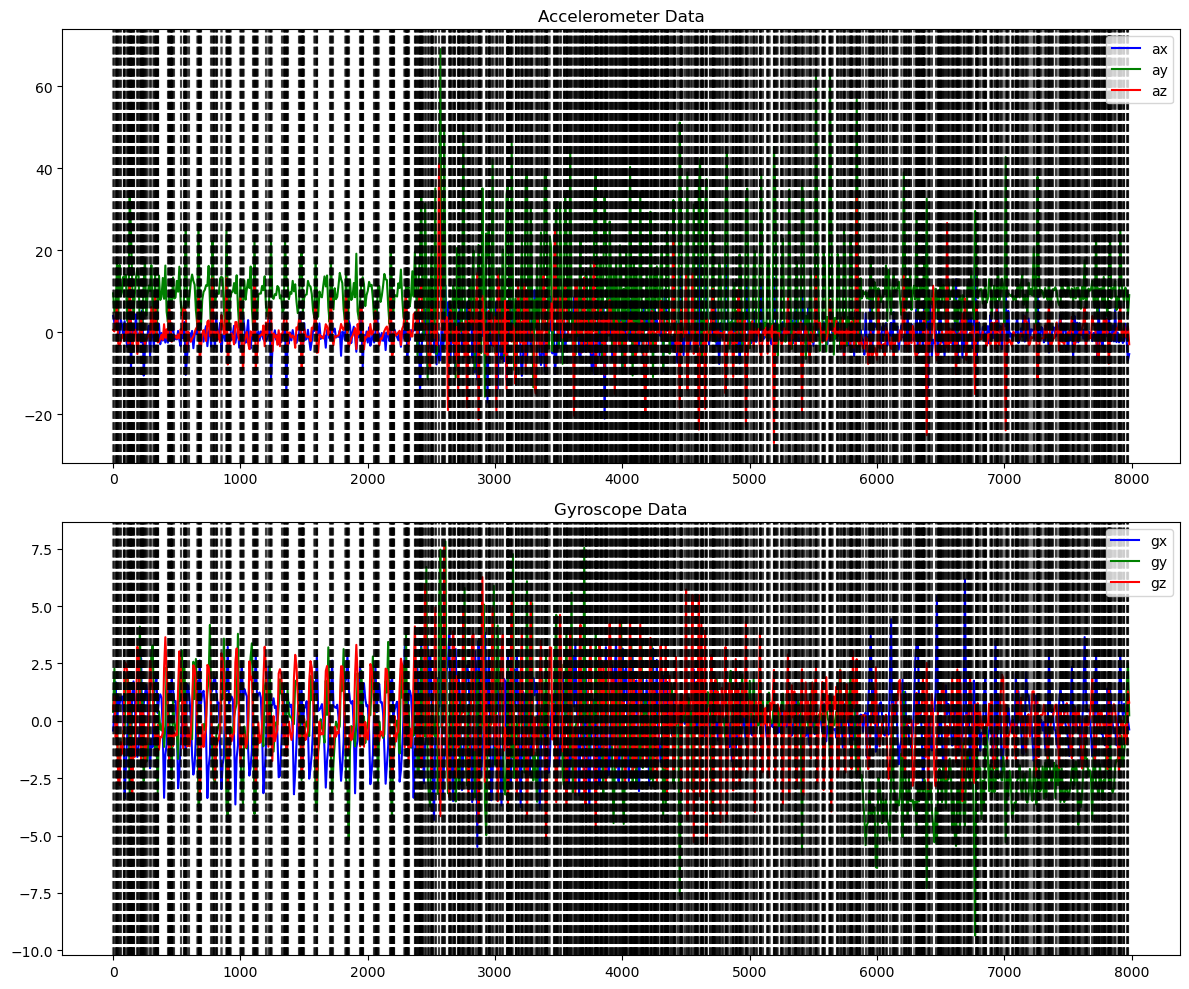

In [29]:
import matplotlib.pyplot as plt

# Calculate class changes to reduce marker clutter
class_changes = [
    i
    for i in range(1, len(new_pred_classes))
    if new_pred_classes[i - 1] != new_pred_classes[i]
]

# Plot the data with reduced markers and increased line width
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Accelerometer Data Plot
for axis, color in zip(["ax", "ay", "az"], ["b", "g", "r"]):
    ax[0].plot(
        new_data.index[::10],
        new_data[axis][::10],
        label=axis,
        color=color,
        linewidth=1.5,
    )  # Plot every 10th point
ax[0].set_title("Accelerometer Data")
ax[0].legend(loc="upper right")

# Gyroscope Data Plot
for axis, color in zip(["gx", "gy", "gz"], ["b", "g", "r"]):
    ax[1].plot(
        new_data.index[::10],
        new_data[axis][::10],
        label=axis,
        color=color,
        linewidth=1.5,
    )  # Plot every 10th point
ax[1].set_title("Gyroscope Data")
ax[1].legend(loc="upper right")

# Adding vertical lines only at points of class change
for change_index in class_changes:
    ax[0].axvline(x=new_data.index[change_index], color="k", linestyle="--", alpha=0.5)
    ax[1].axvline(x=new_data.index[change_index], color="k", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()